# The Elon Meter
Nifty tool to track news about Musk and his wealth

Tracking Elon Musk's activities and wealth is particularly significant in light of Donald Trump's presidential election win, as the billionaire holds influential roles in technology policy shaping.

Musk's ventures—spanning electric vehicles, space exploration, and social media—are tied to global economic trends and political shifts.

Trump's presidency could bring changes in regulatory frameworks, trade policies, and technological priorities, directly impacting Musk's companies. Monitoring Musk provides insights into how these industries adapt and respond to evolving political landscapes.



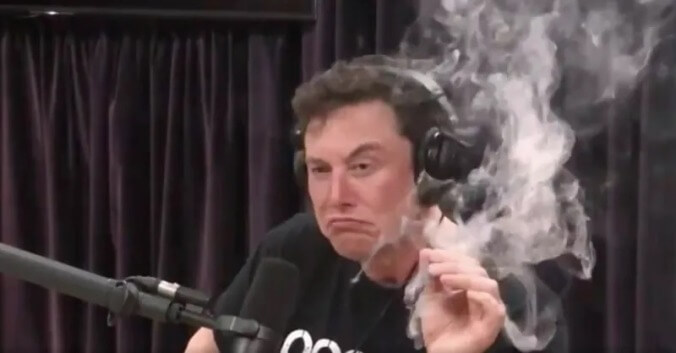

I initially wanted to create a tool that would track Musk's net worth in real-time, but figured that [Forbes](https://www.forbes.com/profile/elon-musk/) has done fantastic work on this already.

Instead, I created a tracker on Tesla, the only publicly listed company (so far), and how it fares with other companies with big market capitalization.

I also created a tracker on crypto, as Musk typically moves the crypto market as well.

I used Yahoo Finance for this and spent $29 for its API.


In [ ]:
pip install yfinance

The code below fetches Tesla's last stock price

Use of AI for this project:

-I did my best in doing the codes on my own, but alas I realized I needed more than a month to perfect Python. Indentation and brackets gave me nightmares while doing this, so I had ChatGPT clean up my code.

-I also used ChatGPT to help me set up Yahoo Finance's sentiment analysis tool.

In [ ]:
import yfinance as yf

# Tesla
companies = [
    {"name": "Tesla", "ticker": "TSLA"},
]

def display_last_closing_prices():
    print("Fetching last closing prices...\n")
    for company in companies:
        try:
            ticker = company["ticker"]
            name = company["name"]

            # Stock data
            stock = yf.Ticker(ticker)
            hist = stock.history(period="5d")  # Fetch last 5 days of data

            # Previous close and current close
            prev_close = hist['Close'].iloc[-2]  # Second last entry is the previous close
            current_close = hist['Close'].iloc[-1]  # Most recent close

            # % change
            percent_change = ((current_close - prev_close) / prev_close) * 100

            # Display results
            print(f"Company: {name}")
            print(f"Ticker: {ticker}")
            print(f"Last Closing Price: ${prev_close:.2f}")
            print(f"% Change: {percent_change:.2f}%\n")

        except Exception as e:
            print(f"Error fetching data for {company['name']} ({company['ticker']}): {e}")

display_last_closing_prices()


Fetching last closing prices...

Company: Tesla
Ticker: TSLA
Last Closing Price: $389.22
% Change: 0.15%



The code below fetches the stock prices of Apple, NVIDIA, Microsoft, Amazon, and Google (Alphabet).

It then computes whether Tesla underperforms or outperforms these companies.

In [ ]:
import yfinance as yf

# List of companies
companies = [
    {"name": "Apple", "ticker": "AAPL"},
    {"name": "NVIDIA", "ticker": "NVDA"},
    {"name": "Microsoft", "ticker": "MSFT"},
    {"name": "Amazon", "ticker": "AMZN"},
    {"name": "Alphabet", "ticker": "GOOGL"},
    {"name": "Tesla", "ticker": "TSLA"},  # Tesla for comparison
]

def fetch_stock_data():
    print("Fetching stock data for top companies...\n")
    data = {}

    for company in companies:
        try:
            ticker = company["ticker"]
            name = company["name"]

            # Stock data
            stock = yf.Ticker(ticker)
            hist = stock.history(period="5d")  # Fetch last 5 days of data

            # Previous close and current close
            prev_close = hist['Close'].iloc[-2]
            current_close = hist['Close'].iloc[-1]

            # % change
            percent_change = ((current_close - prev_close) / prev_close) * 100

            # Market cap
            market_cap = stock.info.get("marketCap", "N/A")

            # Data for comparison
            data[name] = {
                "ticker": ticker,
                "last_close": prev_close,
                "current_close": current_close,
                "percent_change": percent_change,
                "market_cap": market_cap
            }

        except Exception as e:
            print(f"Error fetching data for {company['name']} ({company['ticker']}): {e}")

    return data

def format_market_cap(value):
    if value == "N/A":
        return "N/A"
    for unit in ["", "T", "M", "B", "T"]:  # Unit
        if value < 1000:
            return f"{value:.2f}{unit}"
        value /= 1000
    return f"{value:.2f}T"

def compare_changes(stock_data):
    print("\nStock Data and Tesla Comparison:\n")
    tesla_change = stock_data["Tesla"]["percent_change"]

    for name, info in stock_data.items():
        print(f"Company Name: {name}")
        print(f"Ticker: {info['ticker']}")
        print(f"Market Cap: ${format_market_cap(info['market_cap'])}")
        print(f"Last Closing Price: ${info['last_close']:.2f}")
        print(f"Current Closing Price: ${info['current_close']:.2f}")
        print(f"% Change from Previous Close: {info['percent_change']:.2f}%")

        if name != "Tesla":
            # Compare vs Tesla's % change
            change_diff = info["percent_change"] - tesla_change
            print(f"Comparison to Tesla: {'+' if change_diff > 0 else ''}{change_diff:.2f}%")

            # Win or lose vs Tesla
            if info["percent_change"] > tesla_change:
                print("Result: Wins vs Tesla!")
            else:
                print("Result: Loses vs Tesla!")

        print("-" * 50)

# Fetch stock data
stock_data = fetch_stock_data()

# Compare changes, display results
compare_changes(stock_data)


Fetching stock data for top companies...


Stock Data and Tesla Comparison:

Company Name: Apple
Ticker: AAPL
Market Cap: $3.73T
Last Closing Price: $242.84
Current Closing Price: $246.75
% Change from Previous Close: 1.61%
Comparison to Tesla: +1.46%
Result: Wins vs Tesla!
--------------------------------------------------
Company Name: NVIDIA
Ticker: NVDA
Market Cap: $3.40T
Last Closing Price: $142.44
Current Closing Price: $138.81
% Change from Previous Close: -2.55%
Comparison to Tesla: -2.69%
Result: Loses vs Tesla!
--------------------------------------------------
Company Name: Microsoft
Ticker: MSFT
Market Cap: $3.32T
Last Closing Price: $443.57
Current Closing Price: $446.02
% Change from Previous Close: 0.55%
Comparison to Tesla: +0.41%
Result: Wins vs Tesla!
--------------------------------------------------
Company Name: Amazon
Ticker: AMZN
Market Cap: $2.38T
Last Closing Price: $227.03
Current Closing Price: $226.09
% Change from Previous Close: -0.41%
Comparison to Tesla:

Similarly, the code below pits Tesla against the benchmark index S&P 500.

In [ ]:
import yfinance as yf

def fetch_stock_data(ticker, name):
    try:
        # Fetch stock data
        stock = yf.Ticker(ticker)
        hist = stock.history(period="5d")  # Fetch the last 5 days of data

        # Ensure we have enough data
        if len(hist) < 2:
            raise ValueError("Not enough historical data to calculate % change.")

        # Previous close and current close
        prev_close = hist['Close'].iloc[-2]
        current_close = hist['Close'].iloc[-1]

        # Calculate % change
        percent_change = ((current_close - prev_close) / prev_close) * 100

        return {
            "name": name,
            "last_close": prev_close,
            "current_close": current_close,
            "percent_change": percent_change
        }
    except Exception as e:
        print(f"Error fetching data for {name} ({ticker}): {e}")
        return None

def compare_to_benchmark():
    print("Comparing Tesla to S&P 500...\n")

    # Fetch Tesla
    tesla_data = fetch_stock_data("TSLA", "Tesla")

    # Fetch S&P 500
    benchmark_data = fetch_stock_data("^GSPC", "S&P 500")

    if tesla_data and benchmark_data:
        # Display Tesla data
        print(f"Company Name: {tesla_data['name']}")
        print(f"Last Closing Price: ${tesla_data['last_close']:.2f}")
        print(f"Current Closing Price: ${tesla_data['current_close']:.2f}")
        print(f"% Change from Previous Close: {tesla_data['percent_change']:.2f}%")
        print("-" * 50)

        # Display Benchmark data
        print(f"Benchmark Name: {benchmark_data['name']}")
        print(f"Last Closing Price: ${benchmark_data['last_close']:.2f}")
        print(f"Current Closing Price: ${benchmark_data['current_close']:.2f}")
        print(f"% Change from Previous Close: {benchmark_data['percent_change']:.2f}%")
        print("-" * 50)

        # Compare Tesla to the Benchmark
        change_diff = tesla_data["percent_change"] - benchmark_data["percent_change"]
        if tesla_data["percent_change"] > benchmark_data["percent_change"]:
            result = "Tesla outperforms the S&P 500"
        else:
            result = "Tesla underperforms vs the S&P 500"

        print(f"Comparison to Benchmark:")
        print(f"Tesla's Performance Difference: {'+' if change_diff > 0 else ''}{change_diff:.2f}%")
        print(f"Result: {result}")


compare_to_benchmark()


Comparing Tesla to S&P 500...

Company Name: Tesla
Last Closing Price: $389.22
Current Closing Price: $389.79
% Change from Previous Close: 0.15%
--------------------------------------------------
Benchmark Name: S&P 500
Last Closing Price: $6090.27
Current Closing Price: $6052.85
% Change from Previous Close: -0.61%
--------------------------------------------------
Comparison to Benchmark:
Tesla's Performance Difference: +0.76%
Result: Tesla outperforms the S&P 500


The chart below charts the historical performance of Tesla. A red, dotted line indicates the dreaded election day.

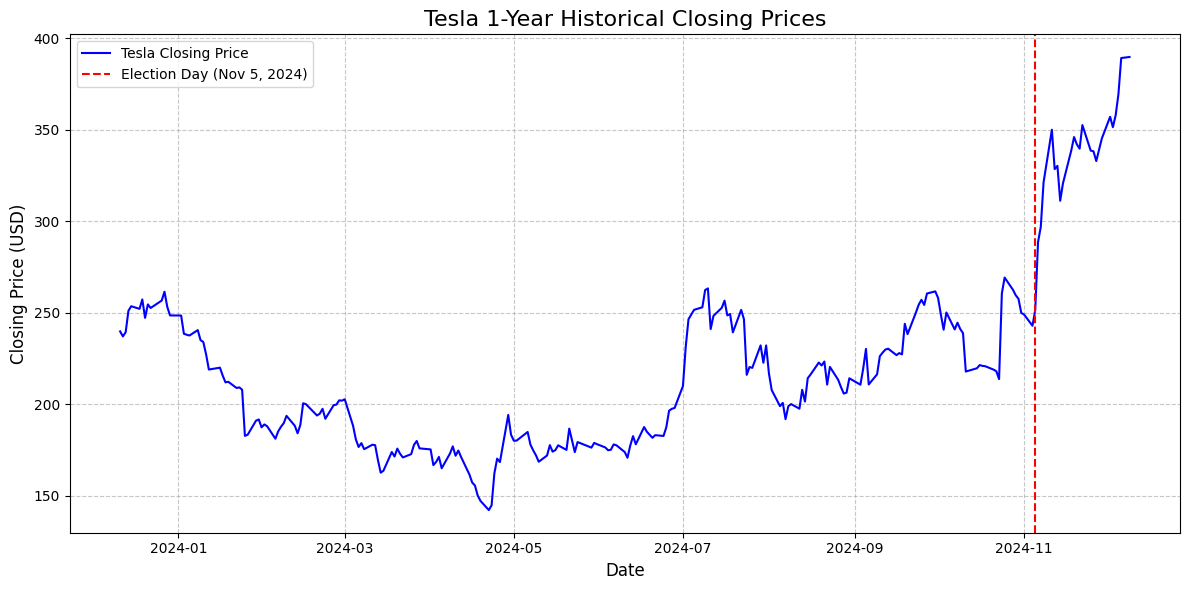

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

def plot_tesla_1yr_chart():
    # Tesla's 1-year historical data
    tesla = yf.Ticker("TSLA")
    hist = tesla.history(period="1y")

    # Plot data
    plt.figure(figsize=(12, 6))
    plt.plot(hist.index, hist["Close"], label="Tesla Closing Price", color="blue")

    # vertical line for election day (Nov 5, 2024)
    election_date = datetime(2024, 11, 5)
    plt.axvline(x=election_date, color="red", linestyle="--", label="Election Day (Nov 5, 2024)")

    # titles and labels
    plt.title("Tesla 1-Year Historical Closing Prices", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Closing Price (USD)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend()
    plt.tight_layout()

    plt.show()

plot_tesla_1yr_chart()


This next chart was particularly the most challenging to do, since I wanted to compare historical prices of Tesla and the S&P 500.

To put them together in one chart, a dual axis was necessary. Otherwise, the S&P 500 would be way up the chart and it was impossible to compare the two.

ChatGPT helped me clean up and basically finish the code T.T

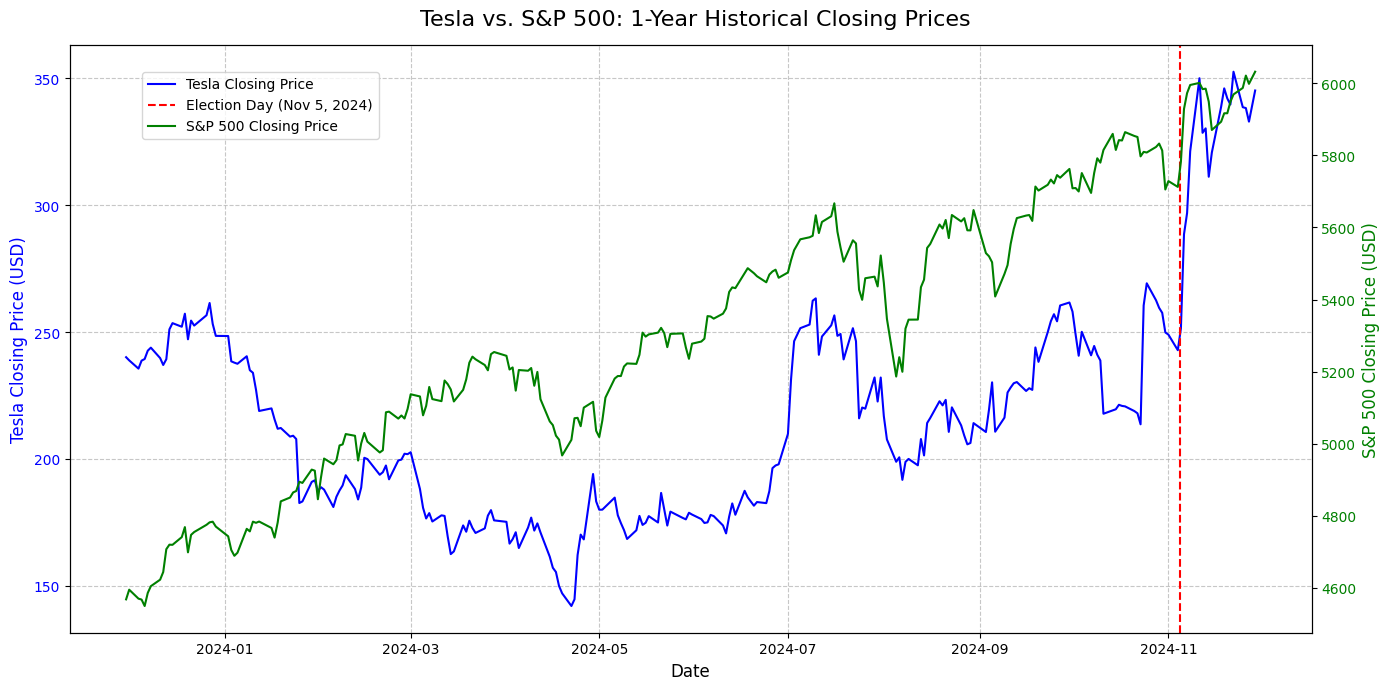

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

def plot_dual_axis_tesla_sp500_1yr_chart():
    # Tesla and S&P 500's 1-year historical data
    tesla = yf.Ticker("TSLA")
    sp500 = yf.Ticker("^GSPC")
    tesla_hist = tesla.history(period="1y")
    sp500_hist = sp500.history(period="1y")

    # Plot
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Tesla left y-axis
    ax1.plot(tesla_hist.index, tesla_hist["Close"], label="Tesla Closing Price", color="blue")
    ax1.set_xlabel("Date", fontsize=12)
    ax1.set_ylabel("Tesla Closing Price (USD)", color="blue", fontsize=12)
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.grid(True, linestyle="--", alpha=0.7)

    # second y-axis S&P 500
    ax2 = ax1.twinx()
    ax2.plot(sp500_hist.index, sp500_hist["Close"], label="S&P 500 Closing Price", color="green")
    ax2.set_ylabel("S&P 500 Closing Price (USD)", color="green", fontsize=12)
    ax2.tick_params(axis="y", labelcolor="green")

    # vertical line election day (Nov 5, 2024)
    election_date = datetime(2024, 11, 5)
    ax1.axvline(x=election_date, color="red", linestyle="--", label="Election Day (Nov 5, 2024)")

    # titles, labels
    fig.suptitle("Tesla vs. S&P 500: 1-Year Historical Closing Prices", fontsize=16)
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
    plt.tight_layout()

    plt.show()

plot_dual_axis_tesla_sp500_1yr_chart()


In [ ]:
These charts are just about the historical prices of Bitcoin, Ethereum, and Dogecoin (1-year and 1-week). A red, dotted line denotes election day.

[*********************100%***********************]  1 of 1 completed

Fetching data for Bitcoin...



[*********************100%***********************]  1 of 1 completed

Fetching data for Ethereum...


Fetching data for Dogecoin...


[*********************100%***********************]  1 of 1 completed


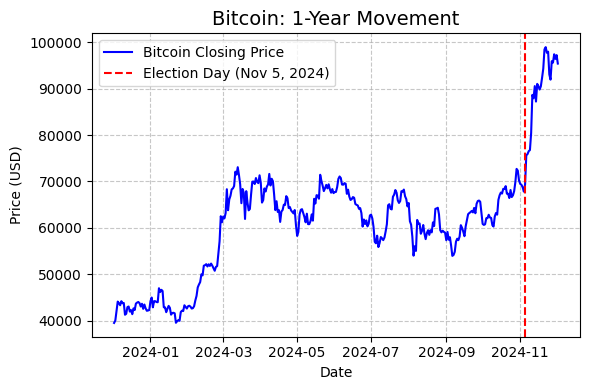

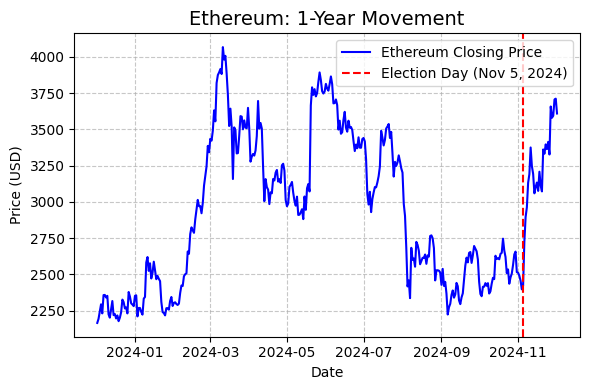

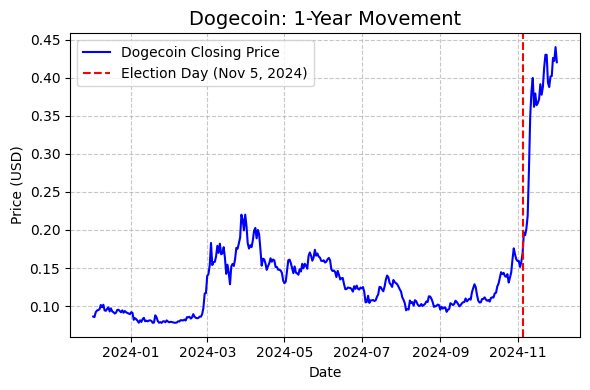

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

def fetch_crypto_data_yf(ticker):
    """Fetch 1-year cryptocurrency data using Yahoo Finance."""
    data = yf.download(ticker, period="1y", interval="1d")
    return data

def plot_crypto_chart(df, title):
    """Plot a cryptocurrency chart with an Election Day marker."""
    plt.figure(figsize=(6, 4))
    plt.plot(df.index, df["Close"], label=f"{title} Closing Price", color="blue")

    # Vertical line for election day
    election_date = datetime(2024, 11, 5)
    plt.axvline(x=election_date, color="red", linestyle="--", label="Election Day (Nov 5, 2024)")

    plt.title(f"{title}: 1-Year Movement", fontsize=14)
    plt.xlabel("Date", fontsize=10)
    plt.ylabel("Price (USD)", fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend()
    plt.tight_layout()

# Elon's crypto and tickers
cryptos = {
    "Bitcoin": "BTC-USD",
    "Ethereum": "ETH-USD",
    "Dogecoin": "DOGE-USD"
}

# Fetch data and plot charts for each
for crypto_name, ticker in cryptos.items():
    print(f"Fetching data for {crypto_name}...")
    crypto_data = fetch_crypto_data_yf(ticker)
    if not crypto_data.empty:
        plot_crypto_chart(crypto_data, crypto_name)

plt.show()


[*********************100%***********************]  1 of 1 completed

Fetching data for Bitcoin...



[*********************100%***********************]  1 of 1 completed

Fetching data for Ethereum...



[*********************100%***********************]  1 of 1 completed

Fetching data for Dogecoin...


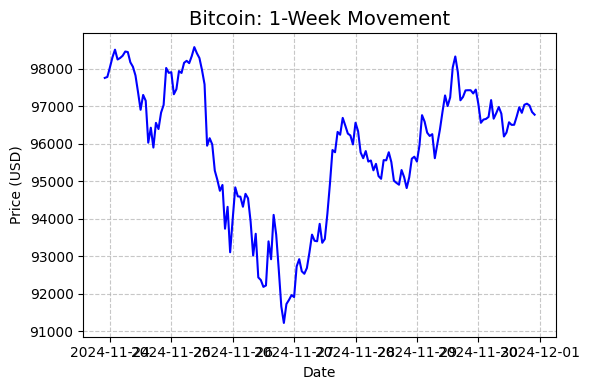

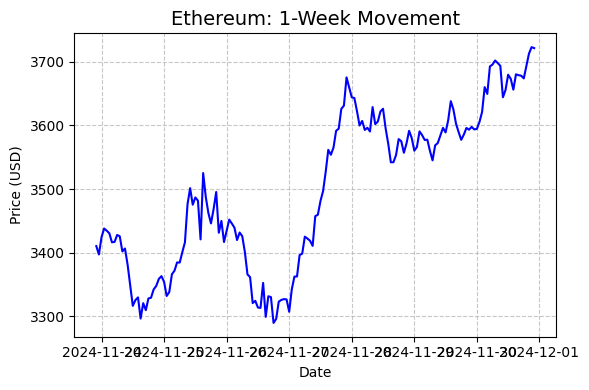

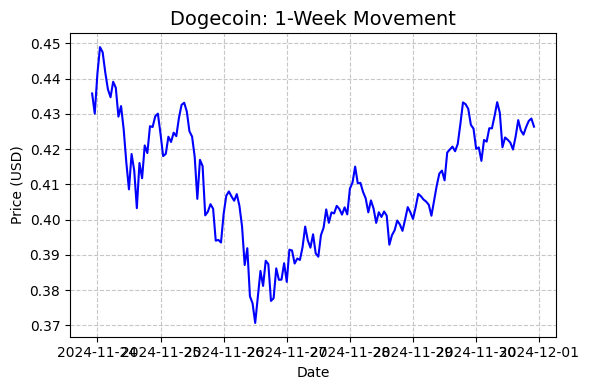

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def fetch_crypto_data_yf(ticker):
    """Fetch 1-week cryptocurrency data using Yahoo Finance."""
    end_date = datetime.now()
    start_date = end_date - timedelta(days=7)
    data = yf.download(ticker, start=start_date, end=end_date, interval="1h")
    return data

def plot_crypto_chart(df, title):
    """Plot a cryptocurrency chart."""
    plt.figure(figsize=(6, 4))
    plt.plot(df.index, df["Close"], label=f"{title} Closing Price", color="blue")
    plt.title(f"{title}: 1-Week Movement", fontsize=14)
    plt.xlabel("Date", fontsize=10)
    plt.ylabel("Price (USD)", fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()

# Define the cryptocurrencies and their Yahoo Finance tickers
cryptos = {
    "Bitcoin": "BTC-USD",
    "Ethereum": "ETH-USD",
    "Dogecoin": "DOGE-USD"
}

# Fetch data and plot charts for each cryptocurrency
for crypto_name, ticker in cryptos.items():
    print(f"Fetching data for {crypto_name}...")
    crypto_data = fetch_crypto_data_yf(ticker)
    if not crypto_data.empty:
        plot_crypto_chart(crypto_data, crypto_name)
    else:
        print(f"No data available for {crypto_name}.")

# Show all charts
plt.show()


Yahoo Finance has a [sentiment analysis](https://polygon.io/blog/sentiment-analysis-with-ticker-news-api-insights) feature.

I have explored this feature and found this quite useful. Here's a summary of how it works:

"The script begins by fetching news with insights for a specific ticker using the Polygon.io Python client, spanning a chosen date range. It then organizes this data using the pandas library to make it ready for analysis. Finally, it uses matplotlib to graphically display the sentiment trends over time, helping to visually identify how different news events affect stock behavior. This simple process allows for easy examination of market sentiments related to news articles."



In [ ]:
import yfinance as yf
from textblob import TextBlob
import pandas as pd

def fetch_news(ticker):
    """Fetch the latest news for a given ticker."""
    stock = yf.Ticker(ticker)
    return stock.news

def analyze_sentiment(news):
    """Analyze sentiment for a list of news articles."""
    sentiments = []
    for article in news:
        title = article.get("title", "")
        link = article.get("link", "")
        publisher = article.get("publisher", "Unknown Publisher")

        if title:
            # sentiment analysis
            sentiment_score = TextBlob(title).sentiment.polarity  # -1 (negative) to 1 (positive)
            if sentiment_score > 0.2:
                sentiment_desc = "Positive"
            elif sentiment_score < -0.2:
                sentiment_desc = "Negative"
            else:
                sentiment_desc = "Neutral"

            sentiments.append({
                "title": title,
                "publisher": publisher,
                "link": link,
                "sentiment": sentiment_score,
                "sentiment_description": sentiment_desc
            })

    return sentiments

def summarize_sentiment(sentiments):
    """Summarize sentiment scores."""
    if not sentiments:
        return {"average_sentiment": None, "total_articles": 0, "breakdown": {"Positive": 0, "Neutral": 0, "Negative": 0}}

    df = pd.DataFrame(sentiments)
    avg_sentiment = df["sentiment"].mean()
    sentiment_breakdown = df["sentiment_description"].value_counts().to_dict()

    breakdown = {"Positive": 0, "Neutral": 0, "Negative": 0}
    breakdown.update(sentiment_breakdown)

    return {
        "average_sentiment": avg_sentiment,
        "total_articles": len(sentiments),
        "breakdown": breakdown
    }

# Tickers
entities = {
    "Elon Musk (Tesla)": "TSLA",
    "Bitcoin": "BTC-USD",
    "Ethereum": "ETH-USD",
    "Dogecoin": "DOGE-USD"
}

# Sentiment analysis
all_results = {}
for name, ticker in entities.items():
    print(f"Fetching news for {name}...")
    news = fetch_news(ticker)
    print(f"Analyzing sentiment for {name}...")
    sentiments = analyze_sentiment(news)
    summary = summarize_sentiment(sentiments)
    all_results[name] = summary

# Results
print("\nSentiment Analysis Summary:")
for entity, result in all_results.items():
    print(f"{entity}:")
    print(f"  Total Articles: {result['total_articles']}")
    print(f"  Average Sentiment Score: {result['average_sentiment']:.2f}" if result["average_sentiment"] is not None else "  No sentiment data available.")
    print(f"  Sentiment Breakdown: {result['breakdown']}")
    print("-" * 50)



Fetching news for Elon Musk (Tesla)...
Analyzing sentiment for Elon Musk (Tesla)...
Fetching news for Bitcoin...
Analyzing sentiment for Bitcoin...
Fetching news for Ethereum...
Analyzing sentiment for Ethereum...
Fetching news for Dogecoin...
Analyzing sentiment for Dogecoin...

Sentiment Analysis Summary:
Elon Musk (Tesla):
  Total Articles: 8
  Average Sentiment Score: 0.22
  Sentiment Breakdown: {'Positive': 3, 'Neutral': 5, 'Negative': 0}
--------------------------------------------------
Bitcoin:
  Total Articles: 8
  Average Sentiment Score: 0.11
  Sentiment Breakdown: {'Positive': 2, 'Neutral': 6, 'Negative': 0}
--------------------------------------------------
Ethereum:
  Total Articles: 8
  Average Sentiment Score: 0.11
  Sentiment Breakdown: {'Positive': 2, 'Neutral': 6, 'Negative': 0}
--------------------------------------------------
Dogecoin:
  Total Articles: 8
  Average Sentiment Score: 0.11
  Sentiment Breakdown: {'Positive': 2, 'Neutral': 6, 'Negative': 0}
----------

Here are more of Musk's companies that we can scrape for financial data:

SpaceX
https://www.sec.gov/Archives/edgar/data/1780312/000095017022005212/asts-20211231.htm

Twitter
https://www.sec.gov/ix?doc=/Archives/edgar/data/0001418091/000141809122000029/twtr-20211231.htm


X.AI CORP
https://www.sec.gov/Archives/edgar/data/2002695/000200269524000001/xslFormDX01/primary_doc.xml




Thank you Prof. Hansen! Loved this class a lot!

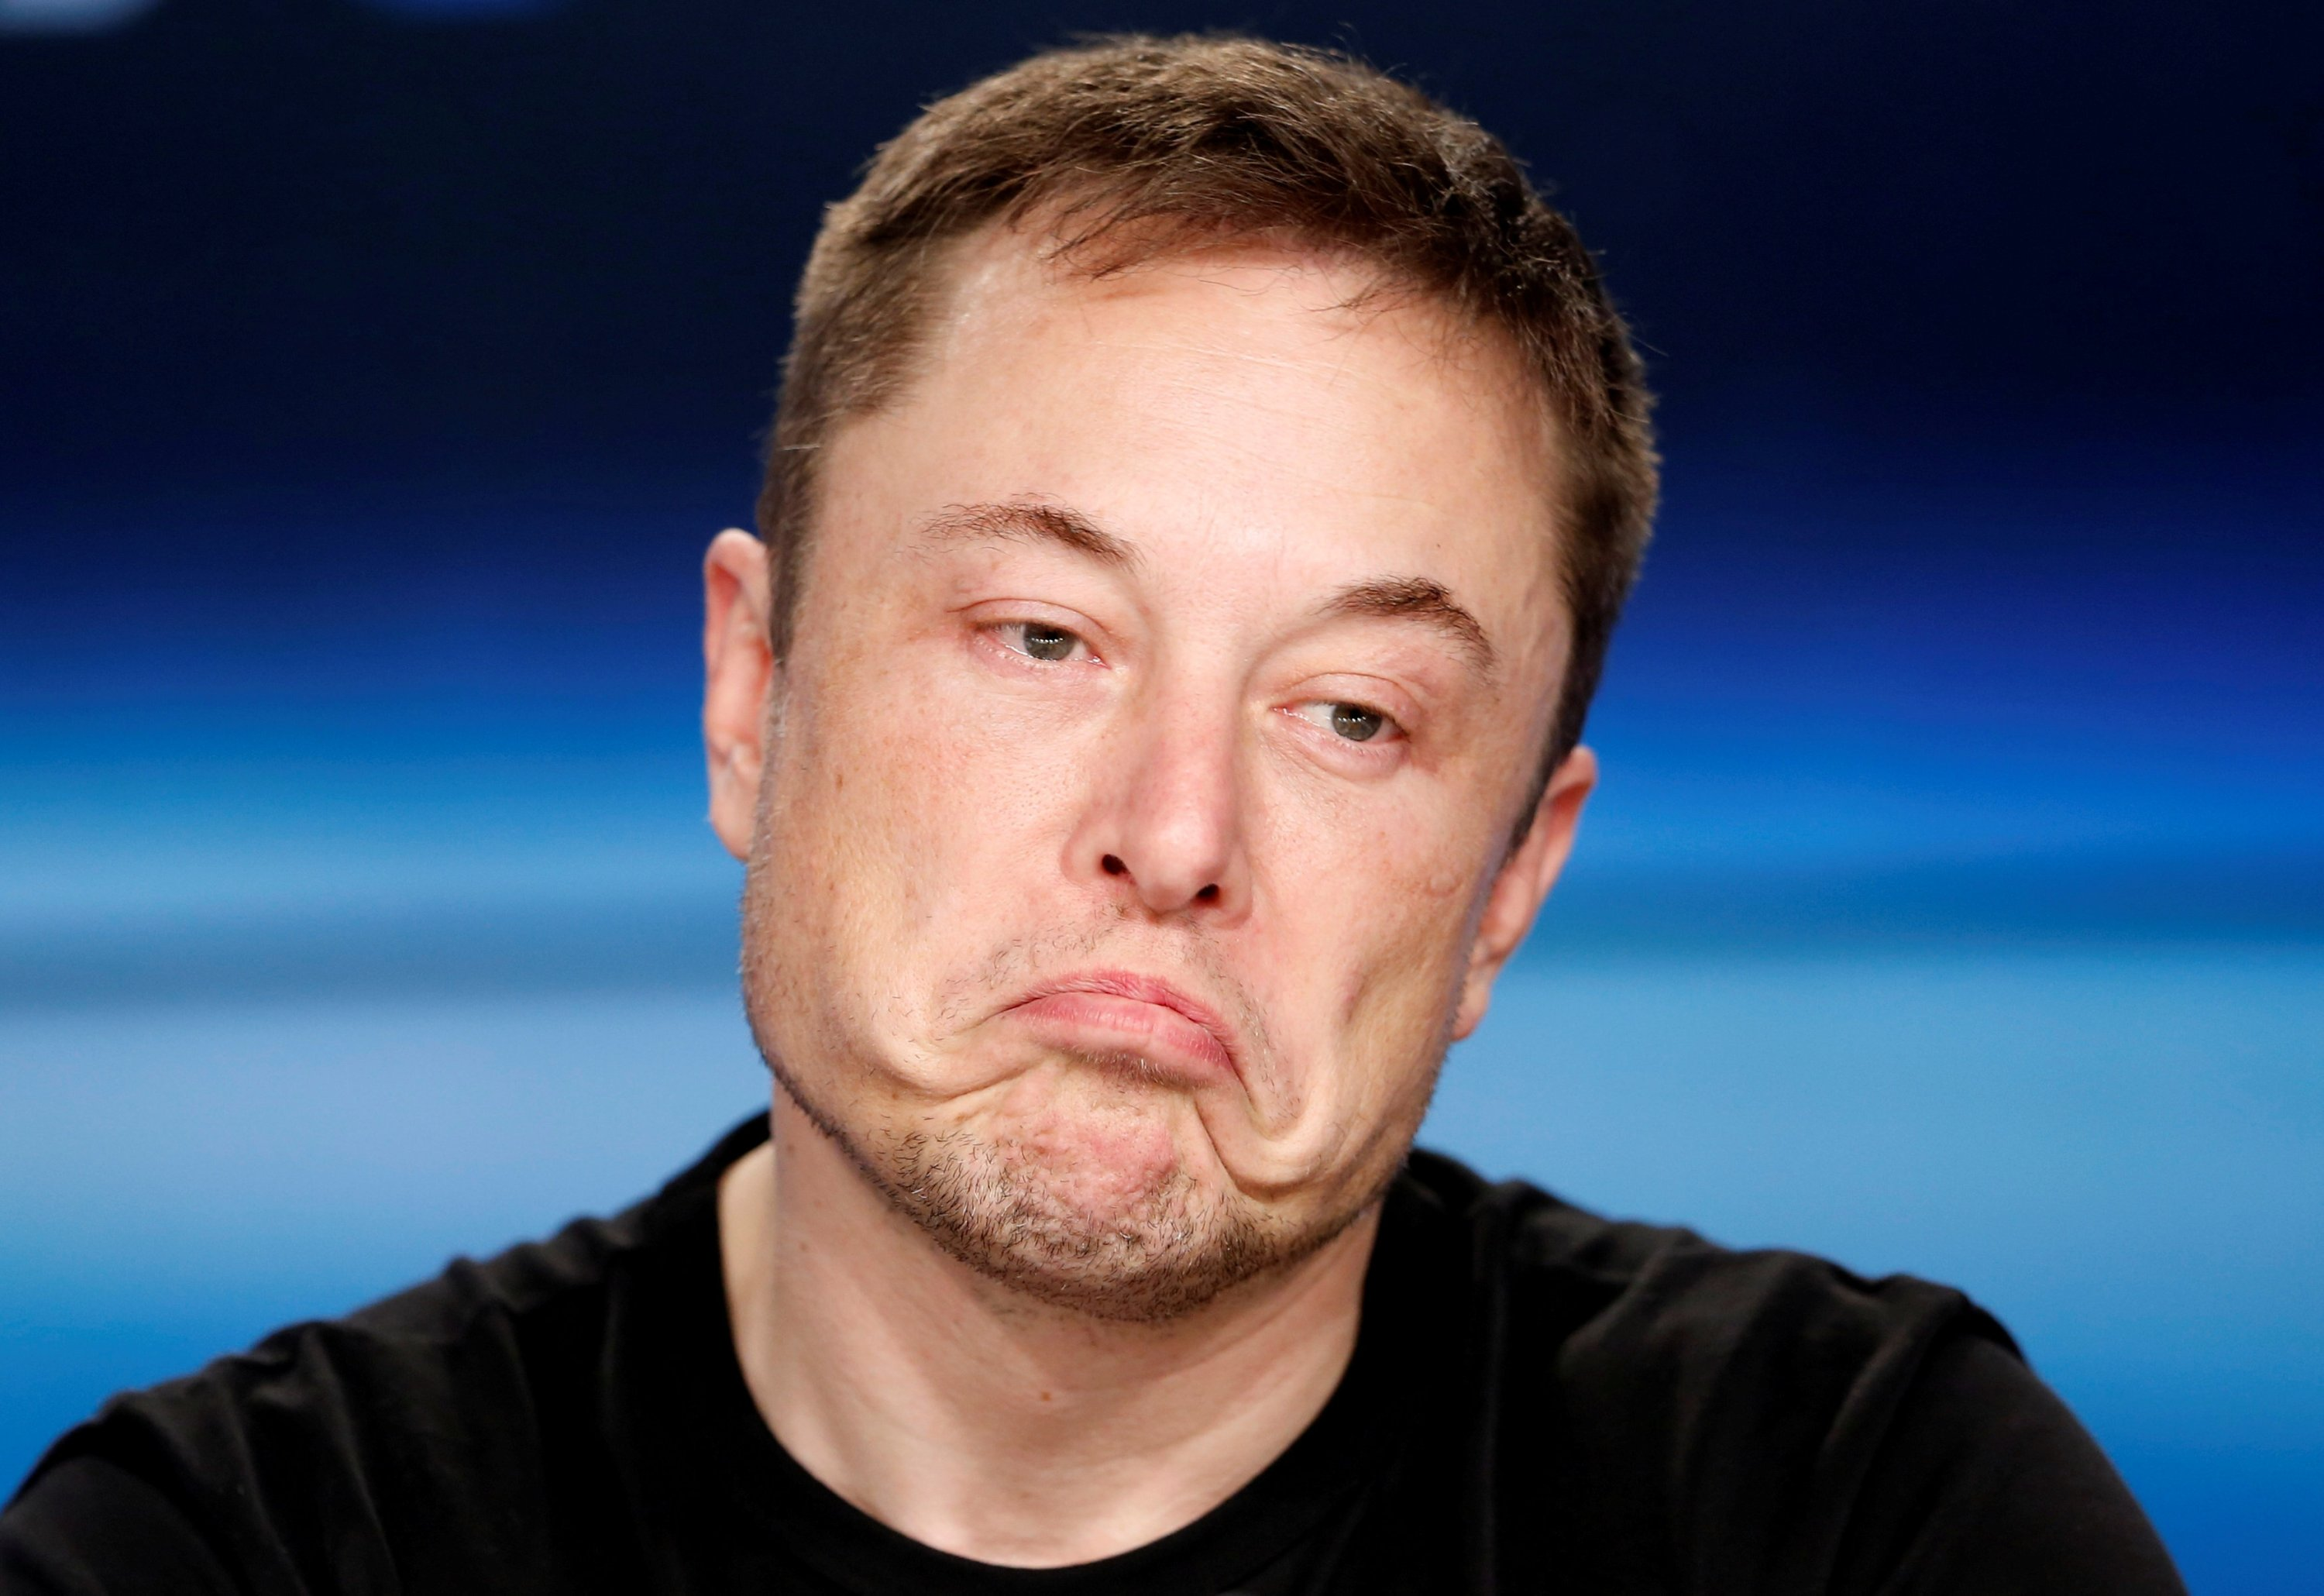